In [10]:
#Preamble
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axgrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
import astropy.io.fits as pyf
import os

plt.style.use('light_mode')

In [11]:
zeta_500 = np.load('big_run/results_4pcf_500.npy')
zeta_550 = np.load('big_run/results_4pcf_550.npy')
zeta_600 = np.load('big_run/results_4pcf_600.npy')
zeta_650 = np.load('big_run/results_4pcf_650.npy')
zeta_700 = np.load('big_run/results_4pcf_700.npy')
zeta_750 = np.load('big_run/results_4pcf_750.npy')
zeta_800 = np.load('big_run/results_4pcf_800.npy')
zeta_850 = np.load('big_run/results_4pcf_850.npy')
zeta_900 = np.load('big_run/results_4pcf_900.npy')

In [12]:
y_array = np.array([zeta_500,zeta_550,zeta_600,zeta_650,zeta_700,zeta_750,zeta_800,zeta_850,zeta_900])

print(y_array.shape)

zeta_reduced = np.mean(y_array, axis=0)/np.std(y_array, axis=0)

(9, 3, 3, 3, 32, 32, 32)


/var/folders/75/649m8lsx35q2n5fj007r4yjw0000gn/T/ipykernel_23575/1558905777.py:5: RuntimeWarning: invalid value encountered in true_divide
  zeta_reduced = np.mean(y_array, axis=0)/np.std(y_array, axis=0)


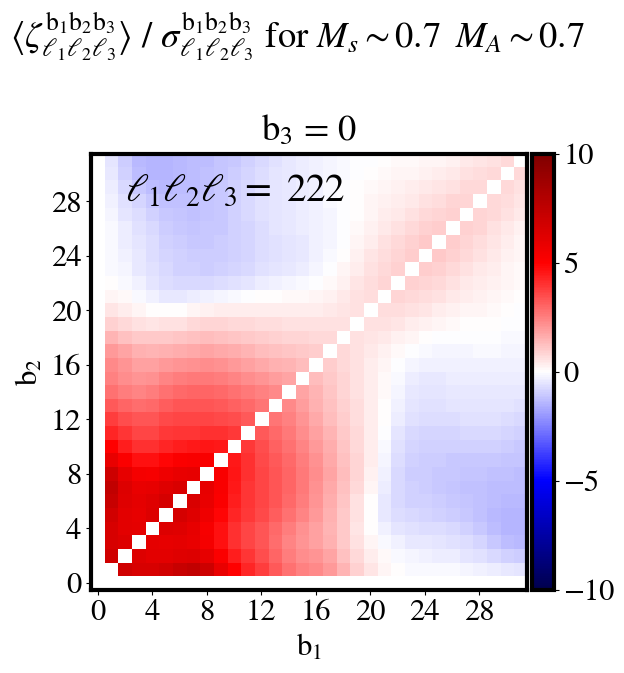

In [18]:
ells = '222'
l_1, l_2, l_3 = int(ells[0]),int(ells[1]),int(ells[2])
b_3 = 0

img = zeta_reduced[l_1, l_2, l_3, :, :, b_3].real

f, ax1 = plt.subplots(1,1, figsize=(10,7))

ells_string = '$\\ell_1, \ell_2, \ell_3 = $' + ells[0] + ',' + ells[1] + ',' + ells[2]
f.suptitle("""$\\langle\\zeta^{\mathrm{b}_1 \mathrm{b}_2 \mathrm{b}_3}_{\ell_1 \ell_2 \ell_3}\\rangle$ / $\\sigma^{\mathrm{b}_1 \mathrm{b}_2 \mathrm{b}_3}_{\ell_1 \ell_2 \ell_3}$ for $M_s \sim 0.7 \; \; M_A \sim 0.7$""", x = 0.475)

im1 = ax1.imshow(img, origin='lower', cmap='seismic')
max_1, min_1 = np.max(img), np.min(img)
max_1, min_1 = 10, -10
im1.set_clim(-max_1, max_1) 
ax1.set_title('$\mathrm{b}_3$ = ' + str(b_3), pad = 10)
ax1.set_xlabel("$\mathrm{b}_1$")
ax1.set_ylabel("$\mathrm{b}_2$")
ax1.set_xticks(range(0,32,4))
ax1.set_yticks(range(0,32,4))
ax1.text(2,28,f'$\ell_1 \ell_2 \ell_3 =$ {ells}', fontsize=28, color='black')

#colorbar
divider1 = axgrid.make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size='5%', pad=0.05)
plt.colorbar(im1, cax=cax1)
f.tight_layout()

In [5]:
# y_500 = zeta_500[l_1, l_2, l_3, :, :, b_3].real
# y_550 = zeta_550[l_1, l_2, l_3, :, :, b_3].real
# y_600 = zeta_600[l_1, l_2, l_3, :, :, b_3].real
# y_650 = zeta_650[l_1, l_2, l_3, :, :, b_3].real
# y_700 = zeta_700[l_1, l_2, l_3, :, :, b_3].real
# y_750 = zeta_750[l_1, l_2, l_3, :, :, b_3].real
# y_800 = zeta_800[l_1, l_2, l_3, :, :, b_3].real
# y_850 = zeta_850[l_1, l_2, l_3, :, :, b_3].real
# y_900 = zeta_900[l_1, l_2, l_3, :, :, b_3].real

# y_array = np.array([y_500,y_550,y_600,y_650,y_700,y_750,y_800,y_850,y_900])

# y_array.shape

# y_ave = np.mean(y_array, axis=0)
# y_std = np.std(y_array, axis=0)

In [6]:
# y_array.shape

(9, 32, 32)

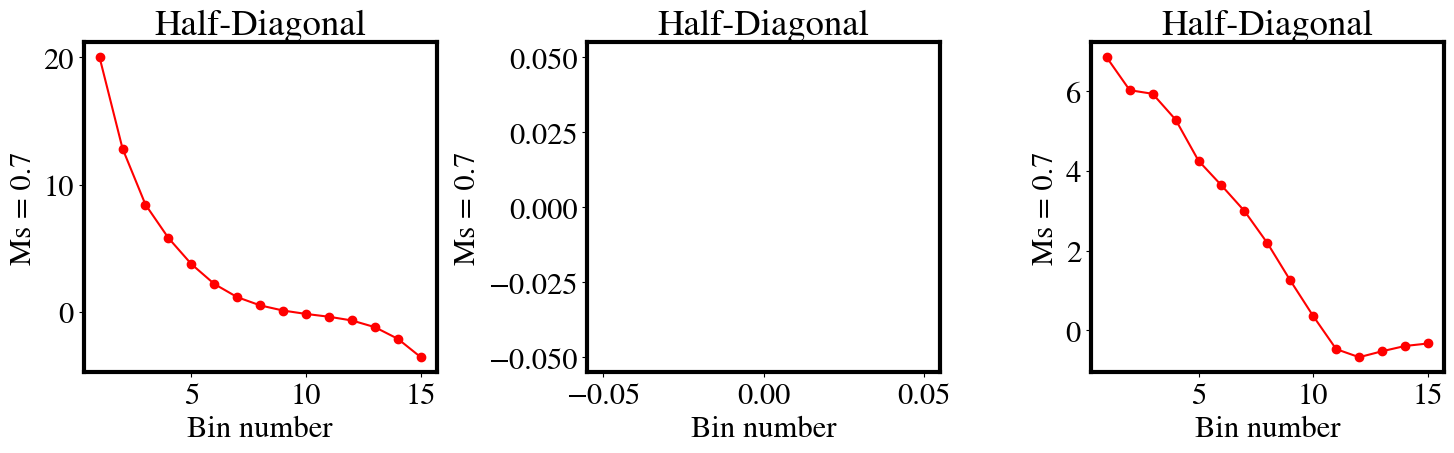

In [17]:
l_1, l_2, l_3 = 0,0,0
img0 = zeta_reduced[l_1, l_2, l_3, :, :, b_3].real
l_1, l_2, l_3 = 1,1,1
img1 = zeta_reduced[l_1, l_2, l_3, :, :, b_3].real
l_1, l_2, l_3 = 2,2,2
img2 = zeta_reduced[l_1, l_2, l_3, :, :, b_3].real
# l_1, l_2, l_3 = 3,3,3
# img3 = zeta_reduced[l_1, l_2, l_3, :, :, b_3].real
# l_1, l_2, l_3 = 4,4,4
# img4 = zeta_reduced[l_1, l_2, l_3, :, :, b_3].real
# l_1, l_2, l_3 = 5,5,5
# img5 = zeta_reduced[l_1, l_2, l_3, :, :, b_3].real

#x-diagonal
half_diagonal_x_0=[]
half_diagonal_x_1=[]
half_diagonal_x_2=[]
# half_diagonal_x_3=[]
# half_diagonal_x_4=[]
# half_diagonal_x_5=[]

for i in range(16):
    half_x_diagonal_0 = img0[2*i,i]
    half_x_diagonal_1 = img1[2*i,i]
    half_x_diagonal_2 = img2[2*i,i]
#     half_x_diagonal_3 = img3[2*i,i]
#     half_x_diagonal_4 = img4[2*i,i]
#     half_x_diagonal_5 = img5[2*i,i]
    
    half_diagonal_x_0.append(half_x_diagonal_0)
    half_diagonal_x_1.append(half_x_diagonal_1)
    half_diagonal_x_2.append(half_x_diagonal_2)
#     half_diagonal_x_3.append(half_x_diagonal_3)
#     half_diagonal_x_4.append(half_x_diagonal_4)
#     half_diagonal_x_5.append(half_x_diagonal_5)
    
    
x = range(16)
y0 = half_diagonal_x_0
y1 = half_diagonal_x_1
y2 = half_diagonal_x_2
# y3 = half_diagonal_x_3
# y4 = half_diagonal_x_4
# y5 = half_diagonal_x_5

#Generating the very large figure
#one figure with 2 columns, and 3 rows
f, ((ax0,ax1,ax2)) = plt.subplots(1,3, figsize=(15,5))
#top left
ax0.plot(x,y0, marker='o')
ax0.set_title("Half-Diagonal")
ax0.set_xlabel("Bin number")
ax0.set_ylabel("Ms = 0.7")
# ax0.text(6,0.020, 'l1,l2,l3 = 0,0,0')
#top right
ax1.plot(x, y1, marker='o')
ax1.set_title("Half-Diagonal")
ax1.set_xlabel("Bin number")
ax1.set_ylabel("Ms = 0.7")
# ax1.text(6,0.04, 'l1,l2,l3 = 1,1,1')
#middle left
ax2.plot(x,y2, marker='o')
ax2.set_title("Half-Diagonal")
ax2.set_xlabel("Bin number")
ax2.set_ylabel("Ms = 0.7")
# ax2.text(6,3e-5, 'l1,l2,l3 = 2,2,2')
#middle right
# ax3.plot(x,y3, marker='o')
# ax3.set_title("Half-Diagonal")
# ax3.set_xlabel("Bin number")
# ax3.set_ylabel("Ms = 0.7")
# ax3.text(6,0.04, 'l1,l2,l3 = 3,3,3')
# #bottom left
# ax4.plot(x,y4, marker='o')
# ax4.set_title("Half-Diagonal")
# ax4.set_xlabel("Bin number")
# ax4.set_ylabel("Ms = 0.7")
# ax4.text(6,2.5e-7, 'l1,l2,l3 = 4,4,4')
# #bottom right
# ax5.plot(x, y5, marker='o')
# ax5.set_title("Half-Diagonal")
# ax5.set_xlabel("Bin number")
# ax5.set_ylabel("Ms = 0.7")
# ax5.text(6,0.04, 'l1,l2,l3 = 5,5,5')
f.tight_layout()
plt.show()